In [1]:
from music_gan import audio
import matplotlib.pyplot as plt
import torchaudio as th_audio
import torch as th
import pywt

In [28]:
help(pywt.dwt)

Help on function dwt in module pywt._dwt:

dwt(data, wavelet, mode='symmetric', axis=-1)
    dwt(data, wavelet, mode='symmetric', axis=-1)
    
    Single level Discrete Wavelet Transform.
    
    Parameters
    ----------
    data : array_like
        Input signal
    wavelet : Wavelet object or name
        Wavelet to use
    mode : str, optional
        Signal extension mode, see :ref:`Modes <ref-modes>`.
    axis: int, optional
        Axis over which to compute the DWT. If not given, the
        last axis is used.
    
    Returns
    -------
    (cA, cD) : tuple
        Approximation and detail coefficients.
    
    Notes
    -----
    Length of coefficients arrays depends on the selected mode.
    For all modes except periodization:
    
        ``len(cA) == len(cD) == floor((len(data) + wavelet.dec_len - 1) / 2)``
    
    For periodization mode ("per"):
    
        ``len(cA) == len(cD) == ceil(len(data) / 2)``
    
    Examples
    --------
    >>> import pywt
    >>> (cA, 

In [30]:
wv = pywt.DiscreteContinuousWavelet("db1")

In [31]:
wv

pywt._extensions._pywt.Wavelet(name='db1', filter_bank=([0.7071067811865476, 0.7071067811865476], [-0.7071067811865476, 0.7071067811865476], [0.7071067811865476, 0.7071067811865476], [0.7071067811865476, -0.7071067811865476]))

In [3]:
fb = wv.filter_bank

In [5]:
fb

([0.7071067811865476, 0.7071067811865476],
 [-0.7071067811865476, 0.7071067811865476],
 [0.7071067811865476, 0.7071067811865476],
 [0.7071067811865476, -0.7071067811865476])

In [7]:
wv.wavefun(level=8)

[array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 

In [31]:
help(wv)

Help on Wavelet object:

class Wavelet(builtins.object)
 |  Wavelet(name, filter_bank=None) object describe properties of
 |  a wavelet identified by name.
 |  
 |  In order to use a built-in wavelet the parameter name must be
 |  a valid name from the wavelist() list.
 |  To create a custom wavelet object, filter_bank parameter must
 |  be specified. It can be either a list of four filters or an object
 |  that a `filter_bank` attribute which returns a list of four
 |  filters - just like the Wavelet instance itself.
 |  
 |  Methods defined here:
 |  
 |  __len__(self, /)
 |      Return len(self).
 |  
 |  __reduce__(...)
 |      Helper for pickle.
 |  
 |  __repr__(self, /)
 |      Return repr(self).
 |  
 |  __str__(self, /)
 |      Return str(self).
 |  
 |  get_filters_coeffs(...)
 |  
 |  get_reverse_filters_coeffs(...)
 |  
 |  wavefun(...)
 |      wavefun(self, level=8)
 |      
 |      Calculates approximations of scaling function (`phi`) and wavelet
 |      function (`psi`) 

In [21]:
str(wv)

'Wavelet db1\n  Family name:    Daubechies\n  Short name:     db\n  Filters length: 2\n  Orthogonal:     True\n  Biorthogonal:   True\n  Symmetry:       asymmetric\n  DWT:            True\n  CWT:            False'

In [22]:
wavelet = pywt.Wavelet("db1")
levdec = pywt.dwt_max_level(1024, wavelet.dec_len)

In [13]:
#wav_p = "/run/media/samuel/M2_Sam_240GB/01 - 7 Minuets, K61b (65a) - I. G Major.flac"

wav_p = "/home/samuel/Musique/Korn_all_flac/01. Here To Stay.flac"

In [8]:
wav_p

'/home/samuel/Musique/Korn_all_flac/01. Here To Stay.flac'

In [33]:
c_a, c_d = audio.wav_to_wavelets(wav_p, 1024, 1024)

In [34]:
print(c_a.max()), print(c_a.min())

tensor(0.7071)
tensor(-0.7071)


(None, None)

In [35]:
print(c_d.max()), print(c_d.min())

tensor(0.4259)
tensor(-0.4471)


(None, None)

In [36]:
c_d.mean()

tensor(2.6427e-08)

In [18]:
0.7071 ** 2

0.49999040999999994

In [17]:
0.7071 ** 2


0.49999040999999994

In [6]:
ca_cd = th.stack([c_a, c_d], dim=1)

In [7]:
audio.wavelets_to_wav(ca_cd, "./out_test_wavelet_funt.wav", 44100)

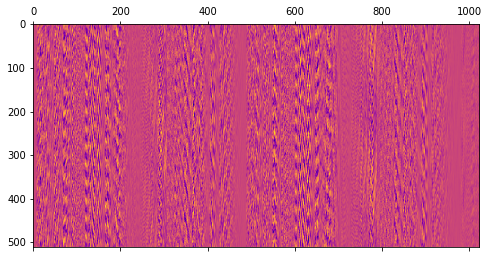

In [8]:
plt.matshow(c_a[1], cmap="plasma")

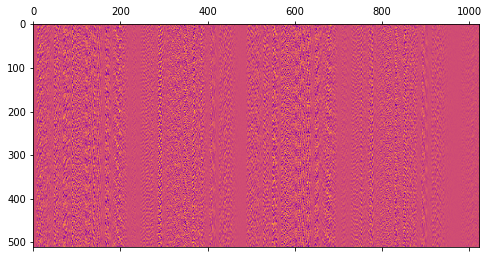

In [9]:
plt.matshow(c_d[1], cmap="plasma")

In [8]:
help(DWT1DForward)

Help on class DWT1DForward in module pytorch_wavelets.dwt.transform1d:

class DWT1DForward(torch.nn.modules.module.Module)
 |  DWT1DForward(J=1, wave='db1', mode='zero')
 |  
 |  Performs a 1d DWT Forward decomposition of an image
 |  
 |  Args:
 |      J (int): Number of levels of decomposition
 |      wave (str or pywt.Wavelet or tuple(ndarray)): Which wavelet to use.
 |          Can be:
 |          1) a string to pass to pywt.Wavelet constructor
 |          2) a pywt.Wavelet class
 |          3) a tuple of numpy arrays (h0, h1)
 |      mode (str): 'zero', 'symmetric', 'reflect' or 'periodization'. The
 |          padding scheme
 |  
 |  Method resolution order:
 |      DWT1DForward
 |      torch.nn.modules.module.Module
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, J=1, wave='db1', mode='zero')
 |      Initializes internal Module state, shared by both nn.Module and ScriptModule.
 |  
 |  forward(self, x)
 |      Forward pass of the DWT.
 |      
 |  

In [29]:
wavelets_forward = DWT1DForward(J=1, wave="db1", mode="zero")

In [97]:
raw_audio, sr = th_audio.load(wav_p)
raw_audio_mono = raw_audio.mean(0)

# pywt

In [98]:
nb_vec = 1024

raw_audio_mono = raw_audio_mono[raw_audio_mono.size()[0] % nb_vec:]
raw_audio_mono = th.stack(raw_audio_mono.split(nb_vec, dim=0), dim=0)

In [99]:
raw_audio_mono.size()

torch.Size([5211, 1024])

In [78]:
wavelet = "db1"

In [79]:
raw_audio_mono.size()

torch.Size([5211, 1024])

In [80]:
cA, cD = pywt.dwt(raw_audio_mono.numpy(), wavelet, mode="zero", axis=-1)

In [81]:
cA.shape

(5211, 512)

In [82]:
cD.shape

(5211, 512)

In [83]:
cA.dtype

dtype('float32')

In [93]:
idx = 1000

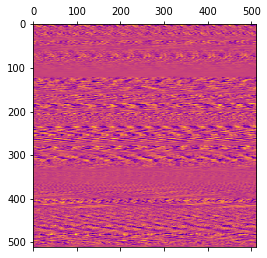

In [94]:
plt.matshow(cA[idx:idx+512], cmap="plasma")

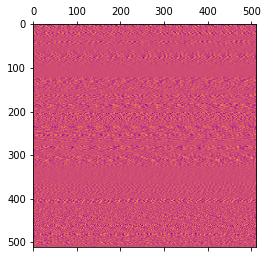

In [95]:
plt.matshow(cD[idx:idx+512], cmap="plasma")

In [87]:
res = pywt.idwt(cA, cD, wavelet, mode="zero", axis=-1)

In [88]:
res = res.reshape(-1)

In [89]:
th_audio.save("out_test_wavelet.wav", th.from_numpy(res)[None, :], 44100)

# PyTorch wavelet

In [37]:
nb_vec = 1024

raw_audio_mono = raw_audio_mono[raw_audio_mono.size()[0] % nb_vec:]
raw_audio_mono = th.stack(raw_audio_mono.split(nb_vec, dim=0), dim=0)
raw_audio_mono = raw_audio_mono.unsqueeze(1)


raw_audio_mono.size()

torch.Size([5211, 1, 1024])

In [41]:
res, l = wavelets_forward(raw_audio_mono)

In [49]:
res_transformed = res[res.size()[0]%512:]
res_transformed = th.stack(res_transformed.split(512, dim=0), dim=0).permute(0, 2, 1, 3)

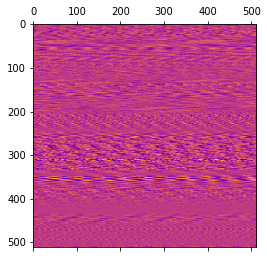

In [50]:
plt.matshow(res_transformed[5, 0], cmap="plasma")

In [47]:
res_transformed.size()

torch.Size([10, 1, 512, 512])

In [6]:
cplx_values = audio.wav_to_stft(
    wav_p
)

In [7]:
magn, phase = audio.stft_to_phase_magn(cplx_values)

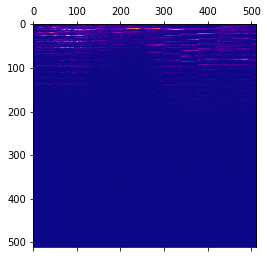

In [10]:
plt.matshow(magn[20], cmap="plasma")